In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
try:

    db = connection.connect(host="localhost", database = 'crypto',user="root", passwd="Your-Password",use_pure=True)
    query = "Select * from data;"
    df = pd.read_sql(query, db)
    db.close()

except Exception as e:

    db.close()
    print(str(e))
    
df = df.drop(columns=["DATE", "TIMA"])
df

C:\Users\pc\AppData\Local\Temp\ipykernel_2532\2908689082.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


,USD,EUR,TOMAN,YEN,GBP
0,1.00,0.90,42000.00,110.00,0.80
1,1.00,0.89,41521.38,111.52,0.80
2,0.99,0.88,41308.69,111.75,0.81
3,0.98,0.89,41444.60,109.97,0.81
4,0.99,0.88,40545.20,111.36,0.81
...,...,...,...,...,...
1435,0.73,0.64,61502.12,109.43,0.73
1436,0.74,0.63,62490.85,107.33,0.72
1437,0.74,0.64,62613.19,106.69,0.71
1438,0.74,0.64,62851.62,106.10,0.71


In [3]:
cdf = df.astype(float)

scaler = MinMaxScaler()

usd = np.array(cdf["USD"]).reshape(-1, 1)
eur = np.array(cdf["EUR"]).reshape(-1, 1)
toman = np.array(cdf["TOMAN"]).reshape(-1, 1)
yen = np.array(cdf["YEN"]).reshape(-1, 1)
gbp = np.array(cdf["GBP"]).reshape(-1, 1)

# usd = scaler.fit_transform(usd)
# eur = scaler.fit_transform(eur)
# toman = scaler.fit_transform(toman)
# yen = scaler.fit_transform(yen)
# gbp = scaler.fit_transform(gbp)

# x_eur = eur / usd
# x_toman = toman / usd
# x_yen = yen / usd
# x_gbp = gbp / usd


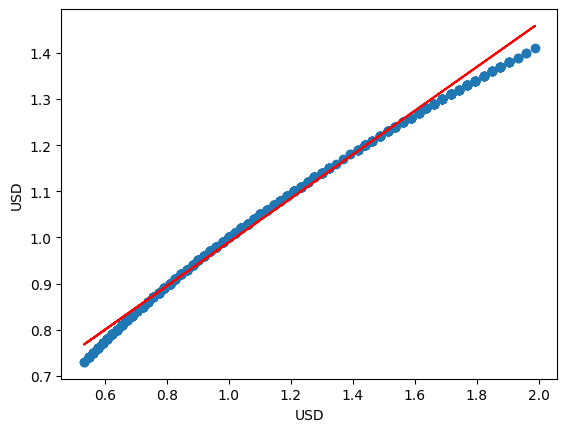

array([[2.88891698]])

In [4]:
model0 = LinearRegression()

x_usd = usd * usd

model0.fit(x_usd, usd)

a = model0.coef_[0][0]
b = model0.intercept_[0]

plt.scatter(x_usd, usd)
plt.plot(x_usd, a * x_usd + b, color="red")
plt.xlabel("USD")
plt.ylabel("USD")
plt.show()

model0.predict([[5]])

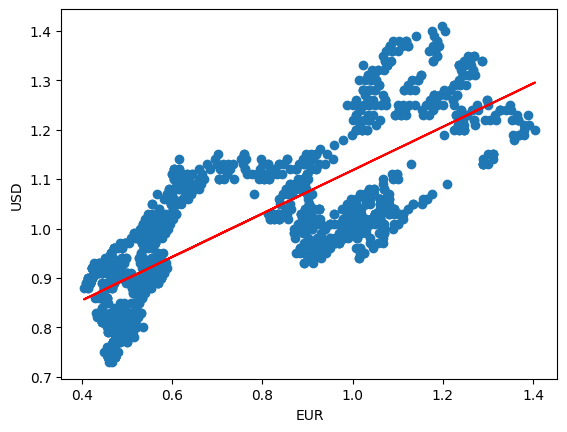

array([[2.87422789]])

In [5]:
model1 = LinearRegression()

x_eur = eur * usd

model1.fit(x_eur, usd)

a = model1.coef_[0][0]
b = model1.intercept_[0]

plt.scatter(x_eur, usd)
plt.plot(x_eur, a * x_eur + b, color="red")
plt.xlabel("EUR")
plt.ylabel("USD")
plt.show()

model1.predict([[5]])

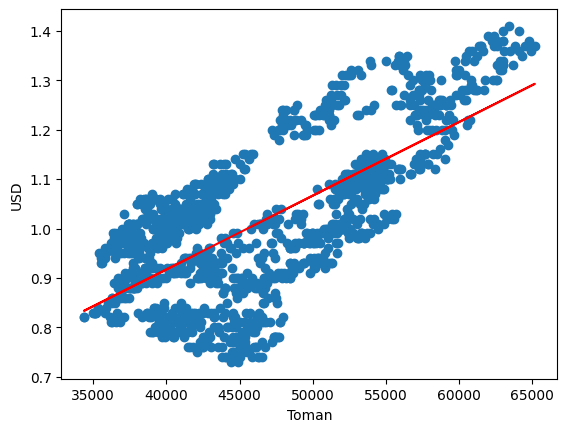

array([[1.06652886]])

In [6]:
model2 = LinearRegression()

x_toman = toman * usd

model2.fit(x_toman, usd)

a = model2.coef_[0][0]
b = model2.intercept_[0]

plt.scatter(x_toman, usd)
plt.plot(x_toman, a * x_toman + b, color="red")
plt.xlabel("Toman")
plt.ylabel("USD")
plt.show()

model2.predict([[50000]])

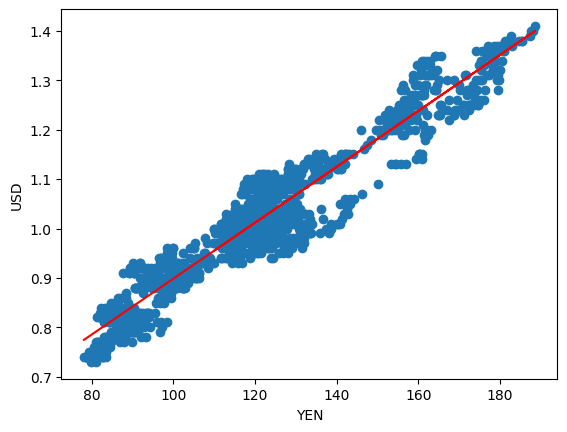

array([[0.3615652]])

In [7]:
model3 = LinearRegression()

x_yen = yen * usd

model3.fit(x_yen, usd)

a = model3.coef_[0][0]
b = model3.intercept_[0]

plt.scatter(x_yen, usd)
plt.plot(x_yen, a * x_yen + b, color="red")
plt.xlabel("YEN")
plt.ylabel("USD")
plt.show()

model3.predict([[5]])

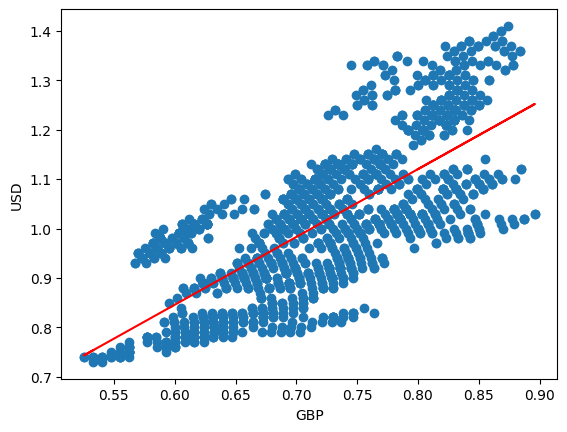

array([[6.88522118]])

In [8]:
model4 = LinearRegression()

x_gbp = gbp * usd

model3.fit(x_gbp, usd)

a = model3.coef_[0][0]
b = model3.intercept_[0]

plt.scatter(x_gbp, usd)
plt.plot(x_gbp, a * x_gbp + b, color="red")
plt.xlabel("GBP")
plt.ylabel("USD")
plt.show()

model3.predict([[5]])